In [1]:
import os
import glob
from skimage import data, io, filters
import matplotlib.pyplot as plt
from IPython.display import display, Image
import PIL
import time
import numpy as np
from skimage.transform import hough_line, hough_line_peaks
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
from matplotlib import cm

video_in_folder = 'videos'
video_files = glob.glob(video_in_folder+'/*.mp4')
print(video_files)

['videos/sonosite_phasedarray_07.mp4', 'videos/philips_curvedlinear_01.mp4', 'videos/sonosite_linear_04.mp4', 'videos/mindray_linear_04.mp4', 'videos/sonosite_curvedlinear_02.mp4', 'videos/sonosite_phasedarray_05.mp4', 'videos/sonosite_linear_01.mp4', 'videos/philips_curvedlinear_02.mp4', 'videos/sonosite_curvedlinear_06.mp4', 'videos/sonosite_phasedarray_03.mp4', 'videos/sonosite_linear_03.mp4', 'videos/sonosite_linear_02.mp4', 'videos/sample-covid.mp4', 'videos/sample-smooth-pulm-edema.mp4', 'videos/sonosite_phasedarray_10.mp4', 'videos/sonosite_curvedlinear_03.mp4', 'videos/sample-ncovid.mp4', 'videos/philips_linear_02.mp4', 'videos/sonosite_phasedarray_09.mp4', 'videos/sonosite_phasedarray_08.mp4', 'videos/mindray_phasedarray_01.mp4', 'videos/mindray_phasedarray_02.mp4', 'videos/sonosite_phasedarray_04.mp4', 'videos/sonosite_phasedarray_02.mp4', 'videos/mindray_curvedlinear.mp4', 'videos/philips_phasedarray_03.mp4', 'videos/sonosite_curvedlinear_05.mp4', 'videos/philips_phasedarray

In [2]:
video_file = video_files[0]
folder, file = os.path.split(video_file)
video_name = os.path.splitext(file)[0]
print(video_name)


sonosite_phasedarray_07


In [3]:
if not os.path.exists('frames'):
    !mkdir frames
if not os.path.exists('final'):
    !mkdir final
if not os.path.exists('temp'):
    !mkdir temp
if not os.path.exists('frames/'+video_name):
    !mkdir frames/$video_name
    !ffmpeg -i $video_file -f image2 "frames/$video_name/video-frame%05d.png"

files = glob.glob('frames/'+video_name+'/*.png')

files.sort()
print(type(files))

ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7.3.0 (crosstool-NG 1.23.0.449-a04d0)
  configuration: --prefix=/home/jason/anaconda3/envs/wavebase --cc=/tmp/build/80754af9/ffmpeg_1587154242452/_build_env/bin/x86_64-conda_cos6-linux-gnu-cc --disable-doc --enable-avresample --enable-gmp --enable-hardcoded-tables --enable-libfreetype --enable-libvpx --enable-pthreads --enable-libopus --enable-postproc --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --disable-nonfree --enable-gpl --enable-gnutls --disable-openssl --enable-libopenh264 --enable-libx264
  libavutil      56. 31.100 / 56. 31.100
  libavcodec     58. 54.100 / 58. 54.100
  libavformat    58. 29.100 / 58. 29.100
  libavdevice    58.  8.100 / 58.  8.100
  libavfilter     7. 57.100 /  7. 57.100
  libavresample   4.  0.  0 /  4.  0.  0
  libswscale      5.  5.100 /  5.  5.100
  libswresample   3.  5.100 /  3.  5.100
  libpostproc  

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


(480, 640)
0.9983333333333333


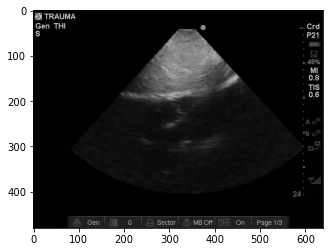

In [4]:
image_path = files[0]
image = rgb2gray(io.imread(image_path))
io.imsave('final/'+video_name+'_in.png',image)
io.imsave('temp/'+video_name+'_00_in.png',image)
plt.imshow(image,'gray')
print(image.shape)
print(image.max())

In [5]:
# take the N first images and find the variance
N = len(files)
cube = np.zeros((image.shape[0], image.shape[1],N))
print(cube.shape)

image_path = files[0]
for i in np.arange(0,N):
    image_path = files[i]
    image = rgb2gray(io.imread(image_path))
    cube[:,:,i] = image


(480, 640, 360)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


1.0


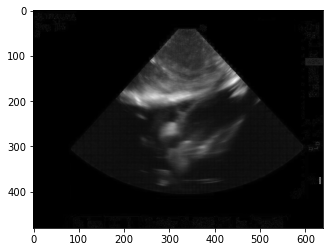

In [6]:
cube_std = np.std(cube,2)
cube_std /= cube_std.max()

print(cube_std.max())
plt.imshow(cube_std,'gray')
io.imsave('temp/'+video_name+'_01_cube_std.png',cube_std)

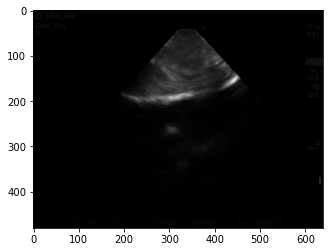

In [32]:
new_image = cube_std * image
plt.imshow(new_image,'gray')

<ipython-input-31-5579048635ad>:4: UserWarning: temp/sonosite_phasedarray_07_02_mask_no_threshold.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_02_mask_no_threshold.png',mask)
<ipython-input-31-5579048635ad>:10: UserWarning: temp/sonosite_phasedarray_07_02_mask_threshold.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_02_mask_threshold.png',mask)


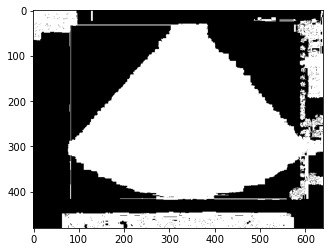

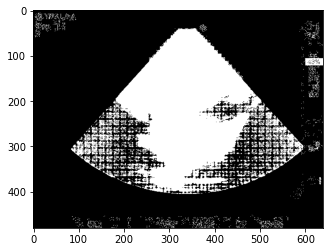

In [31]:
mask = np.zeros(image.shape, dtype=bool)
mask[cube_std>0] = True
plt.imshow(mask,'gray')
io.imsave('temp/'+video_name+'_02_mask_no_threshold.png',mask)

mask = np.zeros(image.shape, dtype=bool)
mask[cube_std>0.06] = True
plt.figure()
plt.imshow(mask,'gray')
io.imsave('temp/'+video_name+'_02_mask_threshold.png',mask)

<ipython-input-23-d5d7a4a85536>:5: UserWarning: temp/sonosite_phasedarray_07_03_erod.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_03_erod.png',mask_erod)
<ipython-input-23-d5d7a4a85536>:10: UserWarning: temp/sonosite_phasedarray_07_04_opening.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_04_opening.png',mask_open)


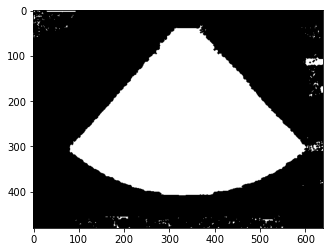

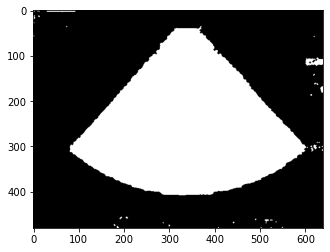

In [23]:
from skimage.morphology import binary_opening, binary_erosion
mask_erod = binary_erosion(mask)
mask_erod = binary_erosion(mask_erod)
plt.imshow(mask_erod,'gray')
io.imsave('temp/'+video_name+'_03_erod.png',mask_erod)

mask_open = binary_opening(mask_erod)
plt.figure()
plt.imshow(mask_open,'gray')
io.imsave('temp/'+video_name+'_04_opening.png',mask_open)

<ipython-input-24-306471630d80>:13: UserWarning: temp/sonosite_phasedarray_07_05_largest.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_05_largest.png',largest_area)


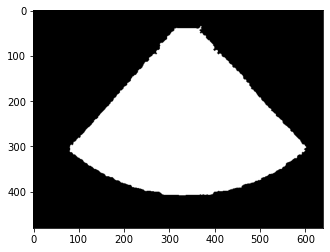

In [24]:
from skimage.measure import label, regionprops

labels = label(mask_open)

props = regionprops(labels)
props.sort(key=lambda x: x.area)

coords = props[-1].coords.T

largest_area = np.zeros(image.shape,dtype=bool)
largest_area[tuple(coords)] = True
plt.imshow(largest_area,'gray')
io.imsave('temp/'+video_name+'_05_largest.png',largest_area)

<ipython-input-11-1f20f924864e>:5: UserWarning: temp/sonosite_phasedarray_07_06_final_mask.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_06_final_mask.png',final_mask)


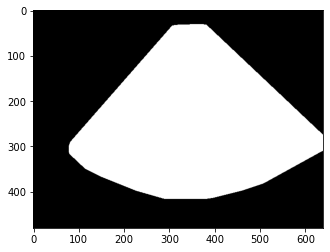

In [11]:
from skimage.morphology import convex_hull_image

final_mask = convex_hull_image(largest_area)
plt.imshow(final_mask,'gray')
io.imsave('temp/'+video_name+'_06_final_mask.png',final_mask)